In [24]:
!git clone https://github.com/deadlyeyes322/practice_mirea.git

Cloning into 'practice_mirea'...
remote: Enumerating objects: 1710, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1710 (delta 25), reused 17 (delta 17), pack-reused 1682 (from 2)
Receiving objects: 100% (1710/1710), 6.56 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (230/230), done.


In [25]:
%cd practice_mirea/
!git pull

/content/practice_mirea/practice_mirea
Already up to date.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/content/practice_mirea/save_data_analys/кибербезопасность_vacancies.csv')

In [28]:
df.head()

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE
0,Руководитель Службы Безопасности,https://hh.ru/vacancy/119132383,Marfatech,не указана,Более 6 лет,Да,0,0,0,0,0,1,0,0,0,0,0,1
1,Middle QA-инженер (Manual),https://hh.ru/vacancy/118310182,ITD Group (International IT-Distribution Group),не указана,От 1 года до 3 лет,Да,0,1,0,0,0,0,0,0,0,0,0,0
2,Стажер направления бизнес-аналитики,https://hh.ru/vacancy/119139973,Лаборатория Касперского,не указана,Нет опыта,Нет,0,0,0,0,0,0,0,0,0,0,0,0
3,C# разработчик,https://hh.ru/vacancy/119160472,СБЕР,не указана,От 1 года до 3 лет,Нет,1,0,0,0,0,1,0,0,0,0,0,0
4,Операционный директор/COO,https://hh.ru/vacancy/118913301,СберСпасибо,не указана,Более 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,0


<ipython-input-29-c678bbe6aeab>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


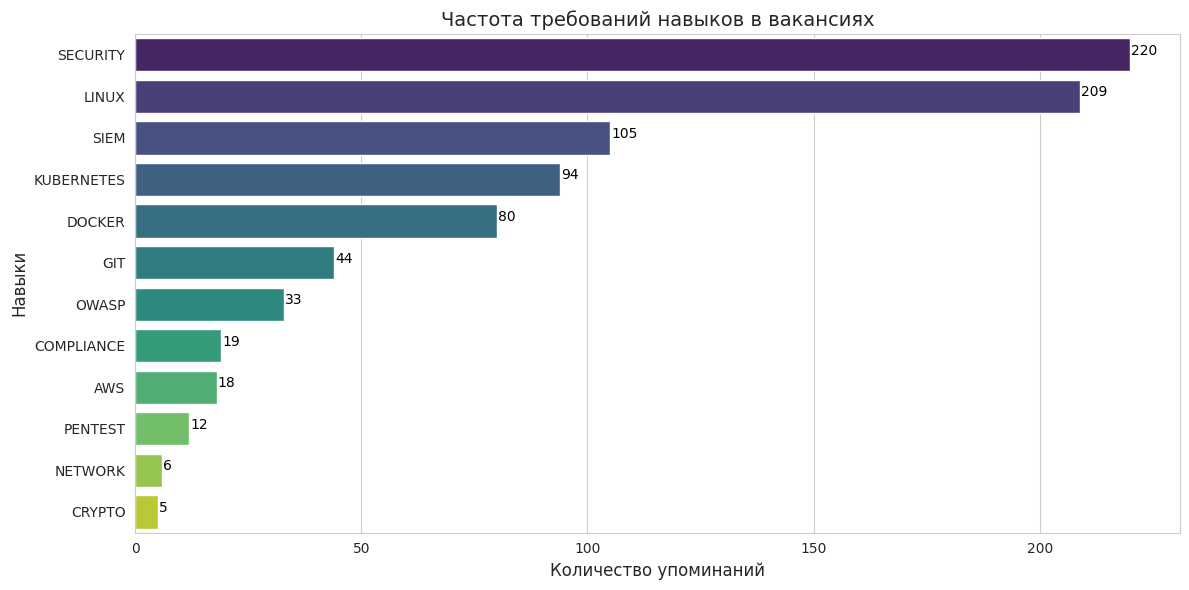

In [29]:
skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)

skills_sum = skills.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=skills_sum.values,
    y=skills_sum.index,
    hue=skills_sum.index,
    palette="viridis",
    legend=False
)

for i, v in enumerate(skills_sum.values):
    ax.text(v + 0.2, i, str(int(v)), color='black', ha='left')

plt.title('Частота требований навыков в вакансиях', fontsize=14)
plt.xlabel('Количество упоминаний', fontsize=12)
plt.ylabel('Навыки', fontsize=12)
plt.tight_layout()

plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Должность         685 non-null    object
 1   Ссылка            685 non-null    object
 2   Компания          685 non-null    object
 3   Зарплата          685 non-null    object
 4   Опыт              685 non-null    object
 5   Удаленная работа  685 non-null    object
 6   GIT               685 non-null    int64 
 7   LINUX             685 non-null    int64 
 8   DOCKER            685 non-null    int64 
 9   AWS               685 non-null    int64 
 10  KUBERNETES        685 non-null    int64 
 11  SECURITY          685 non-null    int64 
 12  PENTEST           685 non-null    int64 
 13  OWASP             685 non-null    int64 
 14  SIEM              685 non-null    int64 
 15  NETWORK           685 non-null    int64 
 16  CRYPTO            685 non-null    int64 
 17  COMPLIANCE      

In [31]:
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,  # среднее между 1 и 3
    'От 3 до 6 лет': 4.5,     # среднее между 3 и 6
    'Более 6 лет': 7           # можно задать условное значение
}

df['exp_in_num'] = df['Опыт'].map(experience_mapping)

In [32]:
df.describe()

,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE,exp_in_num
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,0.064234,0.305109,0.116788,0.026277,0.137226,0.321168,0.017518,0.048175,0.153285,0.008759,0.007299,0.027737,3.886131
std,0.245348,0.460790,0.321403,0.160076,0.344338,0.467266,0.131288,0.214293,0.360525,0.093247,0.085186,0.164339,1.726606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Удаленная работа (код)'] = le.fit_transform(df['Удаленная работа'])

In [34]:
print(df.iloc[:, 3].dtype)

object


In [35]:
for i in range(len(df)):
  if df.iloc[i, 3] == 'не указана':
    df.iloc[i, 3] = np.nan
    continue

  text = str(df.iloc[i, 3]).split()
  if len(text) == 5:
    df.iloc[i, 3] = float((int(text[1]) + int(text[3])) // 2)
  if len(text) == 3:
    df.iloc[i, 3] = float(int(text[1]))
  if text[-1] == 'USD' or text[-1] == 'EUR':
    df.iloc[i, 3] = float(df.iloc[i, 3] * 93)
df['Зарплата'] = pd.to_numeric(df['Зарплата'], errors='coerce').astype('Int64')

In [36]:
df

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE,exp_in_num,Удаленная работа (код)
0,Руководитель Службы Безопасности,https://hh.ru/vacancy/119132383,Marfatech,<NA>,Более 6 лет,Да,0,0,0,0,0,1,0,0,0,0,0,1,7.0,0
1,Middle QA-инженер (Manual),https://hh.ru/vacancy/118310182,ITD Group (International IT-Distribution Group),<NA>,От 1 года до 3 лет,Да,0,1,0,0,0,0,0,0,0,0,0,0,2.0,0
2,Стажер направления бизнес-аналитики,https://hh.ru/vacancy/119139973,Лаборатория Касперского,<NA>,Нет опыта,Нет,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
3,C# разработчик,https://hh.ru/vacancy/119160472,СБЕР,<NA>,От 1 года до 3 лет,Нет,1,0,0,0,0,1,0,0,0,0,0,0,2.0,1
4,Операционный директор/COO,https://hh.ru/vacancy/118913301,СберСпасибо,<NA>,Более 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Ведущий инженер по безопасности приложений (Ap...,https://hh.ru/vacancy/118891694,Х5 Group,<NA>,Более 6 лет,Да,0,0,1,0,1,0,0,1,0,0,0,1,7.0,0
681,Архитектор-инженер по кибербезопасности,https://hh.ru/vacancy/118874119,АБК,<NA>,От 3 до 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,1,4.5,1
682,Инженер-эксперт сопровождения PAM,https://hh.ru/vacancy/119073837,BI.ZONE,<NA>,От 3 до 6 лет,Нет,0,1,0,0,0,1,0,0,0,0,0,0,4.5,1
683,Специалист по анализу защищенности мобильных п...,https://hh.ru/vacancy/118728229,Positive Technologies,<NA>,От 3 до 6 лет,Да,0,0,0,0,0,1,0,0,0,0,0,0,4.5,0


Так как в столбце зарплата огромное количество пропусков попытаемся заполнить их предсказанными значениями. Для этого обучим две модели (KNN, RandomForest) и воспользуемся лучшей моделью для заполнения неизвестных значений

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [38]:
not_null_salaries = df.iloc[df['Зарплата'].notna().values]

X_train, X_test, y_train, y_test = train_test_split(
    not_null_salaries.iloc[:, 6::],
    not_null_salaries.iloc[:, 3],
    test_size=0.15,
    random_state=10
)
X_train.shape, X_test.shape

((63, 14), (12, 14))

In [39]:
params = {'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params)

model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

-0.03554947406733131 {'metric': 'manhattan', 'n_neighbors': 5}


In [40]:
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.25505217284905135

In [41]:
from sklearn.metrics import mean_absolute_error

y_pred = knn.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

48483.333333333336


,predict,real
570,223100.0,135000
149,148475.0,125000
101,187300.0,150000
20,339000.0,350000
296,202000.0,140000
252,202000.0,80000
34,147250.0,110000
99,147250.0,170000
16,190300.0,125100
394,147250.0,95000


In [42]:
from sklearn.tree import DecisionTreeRegressor

params = {'criterion': ['squared_error', 'absolute_error'],
          'max_depth': [None, 3, 5, 7, 10],
          'min_samples_split': [2, 5, 10, 15],
          'min_samples_leaf': [1, 2, 4, 6], }

tree = DecisionTreeRegressor(random_state=10)
model = GridSearchCV(tree, params)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

-0.0202826689570625 {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [43]:
clf = DecisionTreeRegressor(random_state=10, criterion='absolute_error', min_samples_leaf=6, min_samples_split=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

-0.5348868893305929

In [44]:
y_pred = clf.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

68239.79166666667


,predict,real
570,200602.5,135000
149,171687.5,125000
101,175000.0,150000
20,175000.0,350000
296,230000.0,140000
252,230000.0,80000
34,140000.0,110000
99,140000.0,170000
16,175000.0,125100
394,140000.0,95000


In [95]:
for i in range(len(df)):
  if pd.isna(df.iloc[i, 3]):
    features = df.iloc[i, 6:].values.reshape(1, -1)
    df.iloc[i, 3] = clf.predict(features)[0]

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

{'whiskers': [<matplotlib.lines.Line2D at 0x7bfc760d9010>,
 'caps': [<matplotlib.lines.Line2D at 0x7bfc760f3950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bfc760f1d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7bfc761012d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bfc76101e50>],
 'means': []}

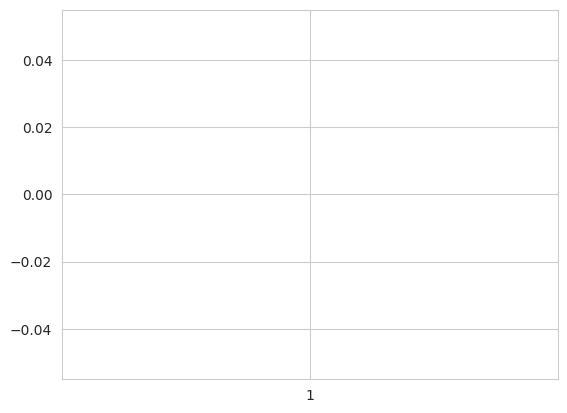

In [72]:
plt.boxplot(df[['Зарплата']])

(array([ 9., 37., 18., 10.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([  2000.,  91800., 181600., 271400., 361200., 451000., 540800.,
        630600., 720400., 810200., 900000.]),
 <BarContainer object of 10 artists>)

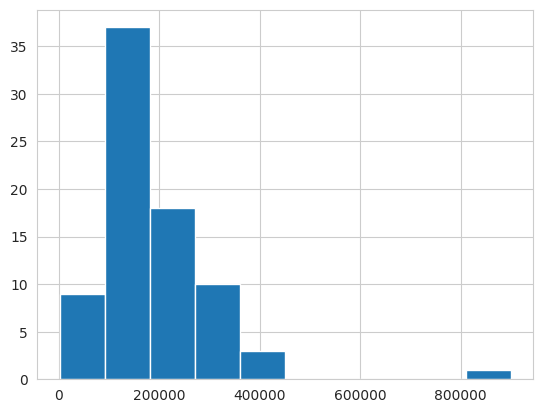

In [71]:
plt.hist(df[['Зарплата']])

In [70]:
print(df[['Зарплата']].median(), df[['Зарплата']].mean(), sep='\n')

Зарплата    150000.0
dtype: Float64
Зарплата    184220.25641
dtype: Float64


<Axes: >

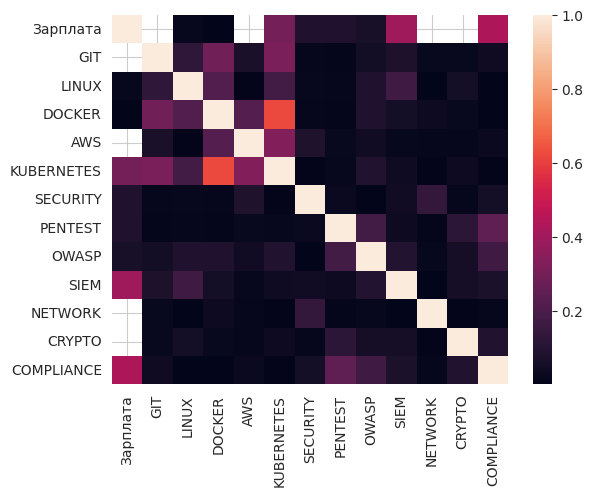

In [65]:
corr_df = df[['Зарплата', 'GIT', 'LINUX', 'DOCKER', 'AWS',	'KUBERNETES', 'SECURITY', 'PENTEST', 'OWASP', 'SIEM', 'NETWORK',	'CRYPTO',	'COMPLIANCE']].corr().abs()

sns.heatmap(corr_df,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

В матрице корреляций можно заметить, что зарплата лучшего всего коррелирует с опытом работы (значение почти 0.4), с остальными значение около 0.1-0.3 (лучше всего с TYPESCRPT,REACT,HTML,CSS)

In [68]:
df_students = pd.read_csv('/content/practice_mirea/save_data_analys/Universities.csv')
df_students

,Unnamed: 0,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE
0,МФТИ,1,1,1,1,1,1,1,1,1,1,1,1
1,ИТМО,1,1,1,1,1,1,1,1,1,1,1,1
2,МГУ,1,1,1,1,1,1,1,1,1,1,1,1
3,МГТУ Баумана,1,1,1,1,1,1,0,1,1,1,1,0
4,МИФИ,1,1,0,0,0,1,1,1,0,1,1,0
5,ВШЭ,1,1,0,0,0,1,0,1,0,1,1,0
6,МИРЭА,1,1,1,1,1,1,1,1,1,1,1,1
7,БГТУ,1,1,0,0,0,1,0,0,0,1,1,0
8,ОГУ,1,1,0,0,0,1,0,0,0,1,1,0
9,ЧГУ,1,1,0,0,0,1,0,0,0,1,1,0


<ipython-input-74-5ee64bc9b6f7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


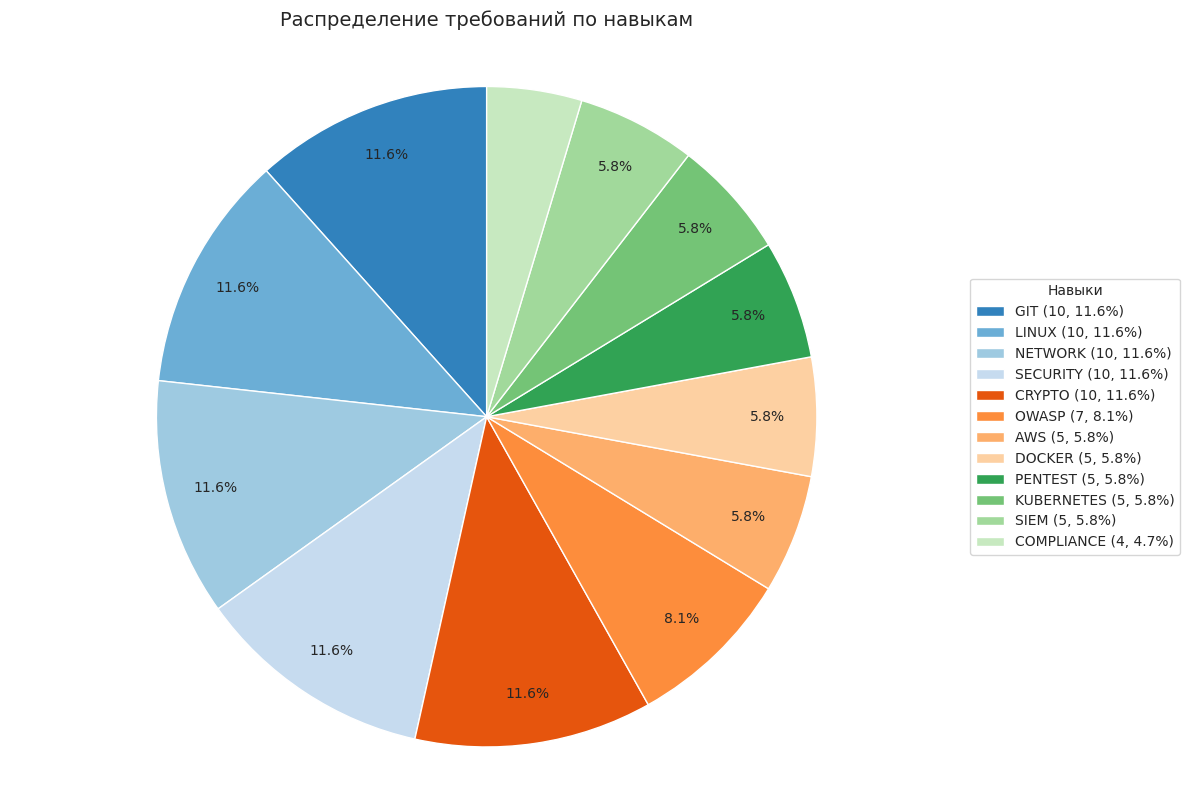

In [74]:
skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)

skills_sum = skills.sum().sort_values(ascending=False)

non_zero_skills = skills_sum[skills_sum > 0]
labels = non_zero_skills.index
sizes = non_zero_skills.values

colors = plt.cm.tab20c(np.arange(len(labels)) % 20)

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Добавляем легенду со всеми навыками и процентами
legend_labels = [f"{label} ({size}, {pct:.1f}%)"
                for label, size, pct in zip(labels, sizes, sizes/sizes.sum()*100)]
ax.legend(
    wedges,
    legend_labels,
    title="Навыки",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Равный аспект, чтобы круг был кругом
ax.axis('equal')
plt.title('Распределение требований по навыкам', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Из диаграммы видно, что на данный момент HTML JAVASCRIPT TYPESCRIPT И REACT изучается в большинстве популярных вузов

# Модель для прогноза зарплаты студентов, различных вузов

На основе имеющихся данных обучим несколько моделей, для подбора гиперпараметров воспользуемся GridSearch

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 6:],
    df.iloc[:, 3],
    test_size=0.2,
    random_state=30
)
X_train.shape, X_test.shape

((548, 14), (137, 14))

In [76]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

Для данной задачи будем пользоваться метрикой MAE, так как зарплата имеет большие значения и квадрат расстояния будет слишком сильно завышаться

In [77]:
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]
}

lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Только для sklearn >= 1.0
}

svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 - манхэттенское, 2 - евклидово расстояние
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

all_params = {
    'GradientBoostingRegressor': (GradientBoostingRegressor(), gb_params),
    'RandomForestRegressor': (RandomForestRegressor(), rf_params),
    'LinearRegression': (LinearRegression(), lr_params),
    'SVR': (SVR(), svr_params),
    'KNeighborsRegressor': (KNeighborsRegressor(), knn_params),
    'MLPRegressor': (MLPRegressor(max_iter=1000), mlp_params)
}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for test_model in [LinearRegression, SVR, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, MLPRegressor]:
  model_name = test_model.__name__

  clf = RandomizedSearchCV(
      all_params[model_name][0],
      param_distributions=all_params[model_name][1],
      n_iter=10,
      cv=5,
      n_jobs=-1,
      scoring='neg_mean_absolute_error',
      random_state=30
  )

  clf.fit(X_train, y_train)

  results.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_
    })
  print(results[-1])


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 601, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1387, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1397, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [50]:
results_df = pd.DataFrame(results)
results_df

""


In [84]:
results_df['MAE'] = -results_df['best_score']

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['model'], results_df['MAE'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Model Comparison (MAE)')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (lower is better)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'best_score'

In [52]:
from sklearn.metrics import mean_absolute_error

results_for_tests = []
for clf in results_df['best_estimator']:
  y_pred = clf.predict(X_test)
  mae = mean_absolute_error(y_pred, y_test)
  results_for_tests.append({
      'model': clf.__class__.__name__,
      'MAE': mae,
      })

KeyError: 'best_estimator'

In [53]:
results_for_tests = pd.DataFrame(results_for_tests)

In [54]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_for_tests['model'], results_for_tests['MAE'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Model Comparison (MAE)')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (lower is better)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'model'

<Figure size 1000x600 with 0 Axes>

На тестовых и на обучающих данных лучше всего себя показал градиентный бустинг, его использовать и будем. Также на обучающих данных очень хорошо себя показал KNN, но на тестовых данных прогноз сильно отличается

# Теперь на основе модели GradientBoostingRegressor сделаем прогноз для студентов

In [87]:
df_students['exp_in_num'] = 0
df_students['Удаленная работа (код)'] = 0
df_students.iloc[:, 1:13]

,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,0,1,1,1,1,0
4,1,1,0,0,0,1,1,1,0,1,1,0
5,1,1,0,0,0,1,0,1,0,1,1,0
6,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,1,0,0,0,1,1,0
8,1,1,0,0,0,1,0,0,0,1,1,0
9,1,1,0,0,0,1,0,0,0,1,1,0


In [92]:
model = results_df[results_df['model'] == 'GradientBoostingRegressor']['best_estimator'].iloc[0]
students_salary_pred = model.predict(pd.concat([], axis=1))
students_salary_pred

KeyError: 'model'

In [82]:
df_students.iloc[:,1:14]

,GIT,LINUX,DOCKER,AWS,KUBERNETES,SECURITY,PENTEST,OWASP,SIEM,NETWORK,CRYPTO,COMPLIANCE
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,0,1,1,1,1,0
4,1,1,0,0,0,1,1,1,0,1,1,0
5,1,1,0,0,0,1,0,1,0,1,1,0
6,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,1,0,0,0,1,1,0
8,1,1,0,0,0,1,0,0,0,1,1,0
9,1,1,0,0,0,1,0,0,0,1,1,0


In [103]:
students_salary_pred.mean()

NameError: name 'students_salary_pred' is not defined

Средняя зарплата студента при выпуске из ВУЗа Москвы должна составлять примерно 134к рублей

# Рассмотрим теперь, то какие навыки более необходимы студентам

In [98]:
student_skills = []
skills_columns = df_students.columns[1:]
for _, row in df_students.iterrows():
    skills = []
    for skill in skills_columns:
        if row[skill] == 1:
            skills.append(skill)
    student_skills.append({
        "ВУЗ": row["НАЗВАНИЕ ВУЗОВ"],
        "Навыки": skills
    })

skills_columns = df.columns[6:18]
df_skills = []
for _, row in df.iterrows():
    skills = []
    for skill in skills_columns:
        if row[skill] == 1:
            skills.append(skill)
    df_skills.append({
        "Вакансия": row["Должность"],
        "Зарплата": row["Зарплата"],
        "Навыки": skills
    })

KeyError: 'НАЗВАНИЕ ВУЗОВ'

In [59]:
def predict_jobs_and_salary(vacancies, student_skills, threshold=0.7):
    matched_jobs = []
    for job in vacancies:
        required_skills = job["Навыки"]
        common_skills = set(required_skills) & set(student_skills)
        if len(required_skills) == 0:
          continue
        score = len(common_skills) / len(required_skills)
        if score >= threshold:
            matched_jobs.append(job)

    if not matched_jobs:
        return 0, 0  # нет подходящих вакансий

    avg_salary = sum(job["Зарплата"] for job in matched_jobs) / len(matched_jobs)
    num_jobs = len(matched_jobs)

    return avg_salary, num_jobs

for student in student_skills:
  print(predict_jobs_and_salary(df_skills, student['Навыки']))

In [60]:

from collections import defaultdict

# Предположим, что student_skills - это список словарей вида:
# [{"ВУЗ": "МФТИ", "Навыки": ["PYTHON", "SQL", ...]}, ...]
# А df_skills - это список словарей вида:
# [{"Вакансия": "Data Scientist", "Навыки": ["PYTHON", "ML"], "salary": 150000}, ...]

deficit_counts = defaultdict(int)

# Проверяем и обрабатываем только вакансии с указанными навыками
for job in df_skills:
    if not job.get("Навыки"):  # Пропускаем вакансии без указания навыков
        continue

    required_skills = set(job["Навыки"])

    for student in student_skills:
        # Проверяем, что student - это словарь с ключом "Навыки"
        if not isinstance(student, dict) or "Навыки" not in student:
            continue

        student_skills_set = set(student["Навыки"])
        missing_skills = required_skills - student_skills_set

        for skill in missing_skills:
            deficit_counts[skill] += 1

# Сортируем по убыванию частоты
sorted_deficit = sorted(deficit_counts.items(), key=lambda x: -x[1])

print("Топ навыков, которых чаще всего не хватает:")
for skill, count in sorted_deficit[:10]:  # Выводим топ-10
    print(f"{skill}: {count} раз")

NameError: name 'df_skills' is not defined

In [97]:
skills, counts = zip(*sorted_deficit[:10])  # Берем топ-10

plt.barh(skills, counts, color='red')
plt.title("Топ-10 навыков, которых не хватает студентам")
plt.xlabel("Количество вакансий с дефицитом")
plt.show()

NameError: name 'sorted_deficit' is not defined

In [62]:
!git add .

In [63]:
!git commit -m "Fully created google colab file"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2c50543b13ae.(none)')


In [64]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
